# Download Data

In [ ]:
import pandas
from datetime import date
import yfinance as yf

start = "2023-01-01"
end = date.today()
tickers = ["CAT","CVX","DIS","GM","GOOG","JNJ","JPM","MA","MS","NEE","NFLX","NVDA","ORCL","PFE","TSLA"]
tickers_data = {}
for t in tickers:
  tickers_data[t] = yf.Ticker(t)
his_data = yf.download(tickers, start, end, interval="1d")["Close"]
print(his_data.columns)


stock_names = {
"CAT" : his_data['CAT'] ,
"CVX" : his_data['CVX'] ,
"DIS" : his_data['DIS'] ,
"GM" : his_data['GM'] ,
"GOOG" : his_data['GOOG'] ,
"JNJ" : his_data['JNJ'] ,
"JPM" : his_data['JPM'] ,
"MA" : his_data['MA'] ,
"MS" : his_data['MS'] ,
"NEE" : his_data['NEE'] ,
"NFLX" : his_data['NFLX'] ,
"NVDA" : his_data['NVDA'] ,
"ORCL" : his_data['ORCL'] ,
"PFE" : his_data['PFE'] ,
"TSLA" : his_data['TSLA']

}

print(stock_names['TSLA'])
print(type(stock_names['TSLA']))

TSLA_2023_01_03 = stock_names['TSLA']["2023-01-03"]
print(TSLA_2023_01_03)

/tmp/ipython-input-24-3230317421.py:11: FutureWarning: YF.download() has changed argument auto_adjust default to True
  his_data = yf.download(tickers, start, end, interval="1d")["Close"]
[*********************100%***********************]  15 of 15 completed

Index(['CAT', 'CVX', 'DIS', 'GM', 'GOOG', 'JNJ', 'JPM', 'MA', 'MS', 'NEE',
       'NFLX', 'NVDA', 'ORCL', 'PFE', 'TSLA'],
      dtype='object', name='Ticker')
Date
2023-01-03    108.099998
2023-01-04    113.639999
2023-01-05    110.339996
2023-01-06    113.059998
2023-01-09    119.769997
                 ...    
2025-06-18    322.049988
2025-06-20    322.160004
2025-06-23    348.679993
2025-06-24    340.470001
2025-06-25    327.549988
Name: TSLA, Length: 621, dtype: float64
<class 'pandas.core.series.Series'>
108.0999984741211


/tmp/ipython-input-21-1704166989.py:15: FutureWarning: YF.download() has changed argument auto_adjust default to True
  his_data = yf.download(tickers, start, end, interval="1d")["Close"]
[*********************100%***********************]  15 of 15 completed


<class 'pandas.core.series.Series'>


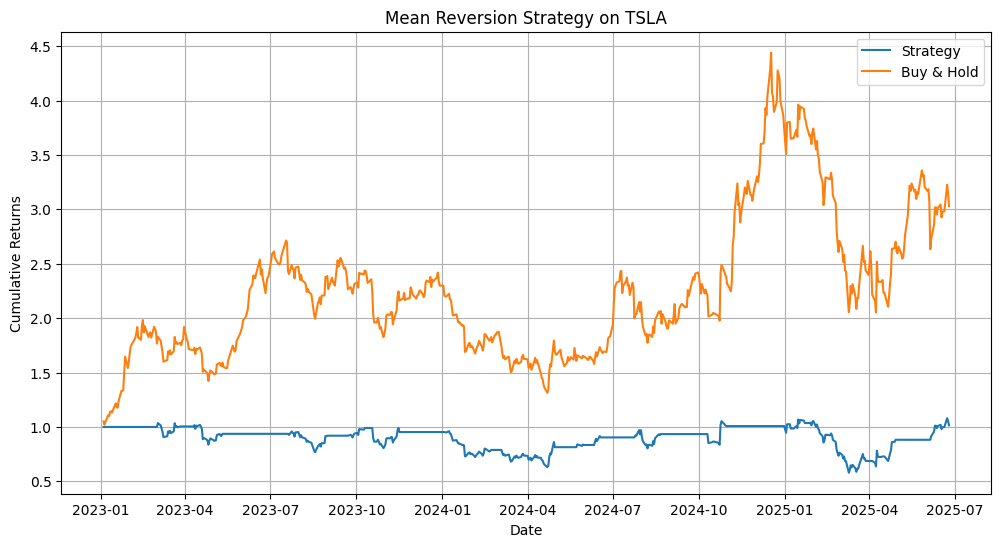

In [ ]:
import pandas as pd
from datetime import date
import yfinance as yf
import matplotlib.pyplot as plt

start = "2023-01-01"
end = date.today()

window = 20 # days
holding_period = 5 # days
threshold = 0.98 #percentage deviation from MA

tickers = ["CAT","CVX","DIS","GM","GOOG","JNJ","JPM","MA","MS","NEE","NFLX","NVDA","ORCL","PFE","TSLA"]

his_data = yf.download(tickers, start, end, interval="1d")["Close"]

price_tesla = his_data['TSLA']
rolling_mean = price_tesla.rolling(window=window).mean()

signal = (price_tesla < threshold * rolling_mean)
positions = pd.Series(0, index=price_tesla.index)

for i in range(len(signal)):
  if signal.iloc[i]:
    positions.iloc[i:i+holding_period] = 1

daily_returns = price_tesla.pct_change()
print(type(daily_returns))
strategy_returns = positions.shift(1) * daily_returns

cumulative_strategy = (1 + strategy_returns).cumprod()
cumulative_market = (1 + daily_returns).cumprod()


plt.figure(figsize=(12,6))
plt.plot(cumulative_strategy, label="Strategy")
plt.plot(cumulative_market, label="Buy & Hold")
plt.title("Mean Reversion Strategy on TSLA")
plt.xlabel("Date")
plt.ylabel("Cumulative Returns")
plt.legend()
plt.grid(True)
plt.show()

# Mean Reversion w/ all stocks

/tmp/ipython-input-2-4095439820.py:14: FutureWarning: YF.download() has changed argument auto_adjust default to True
  his_data = yf.download(tickers, start, end, interval="1d")["Close"]
[*********************100%***********************]  15 of 15 completed


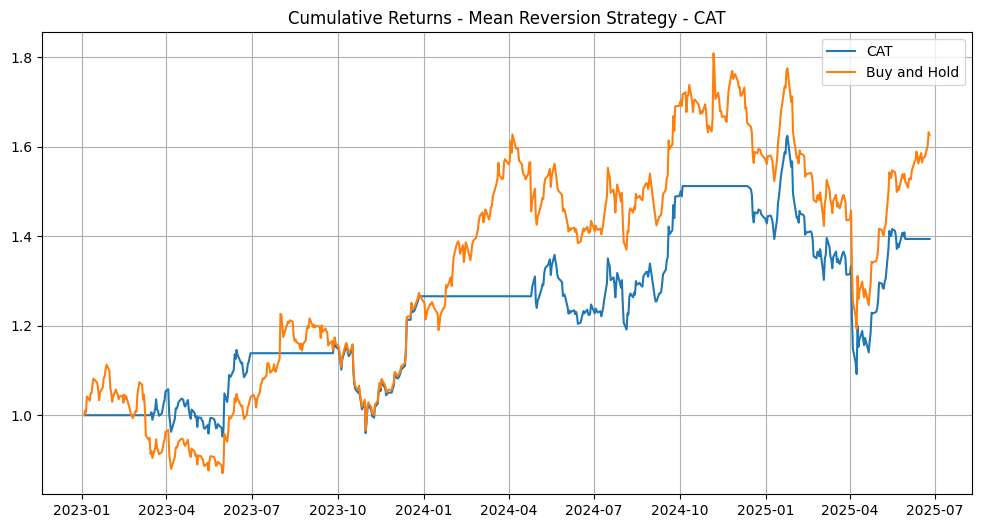

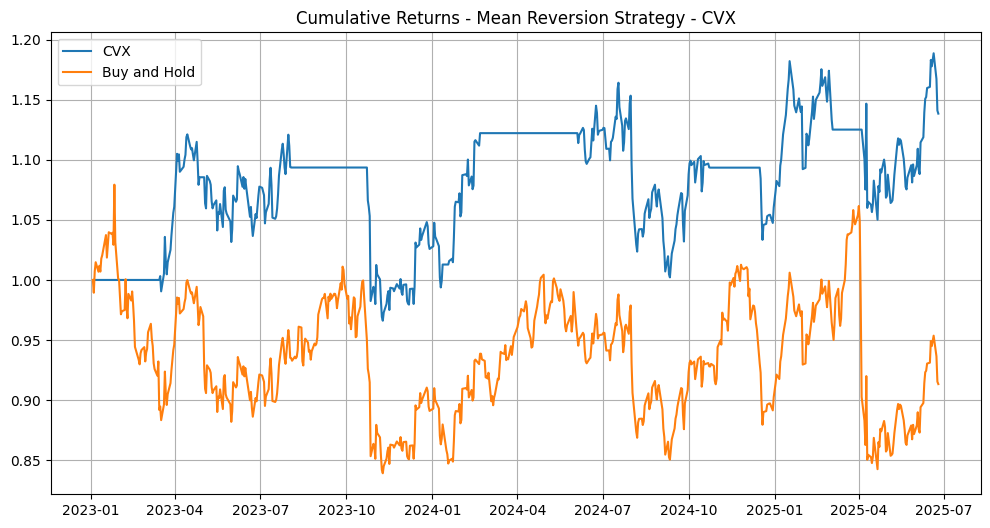

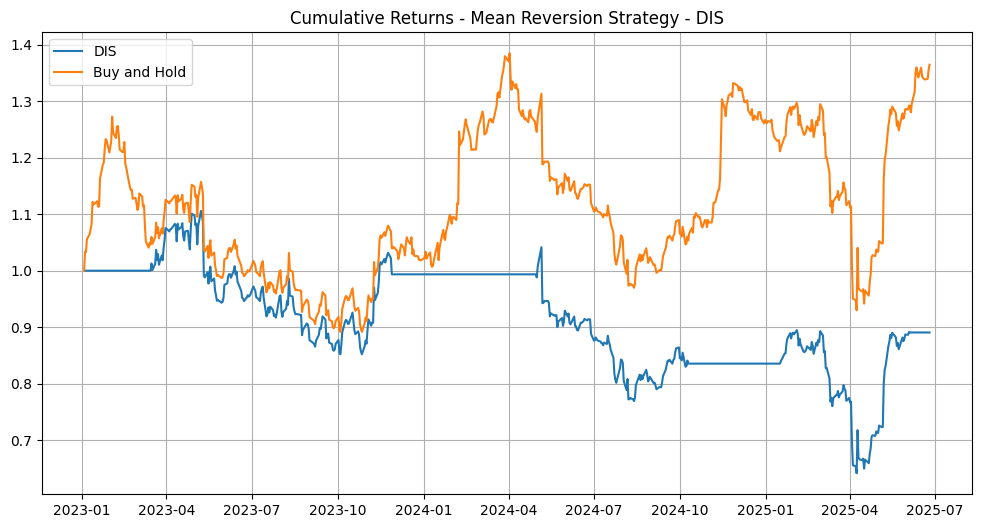

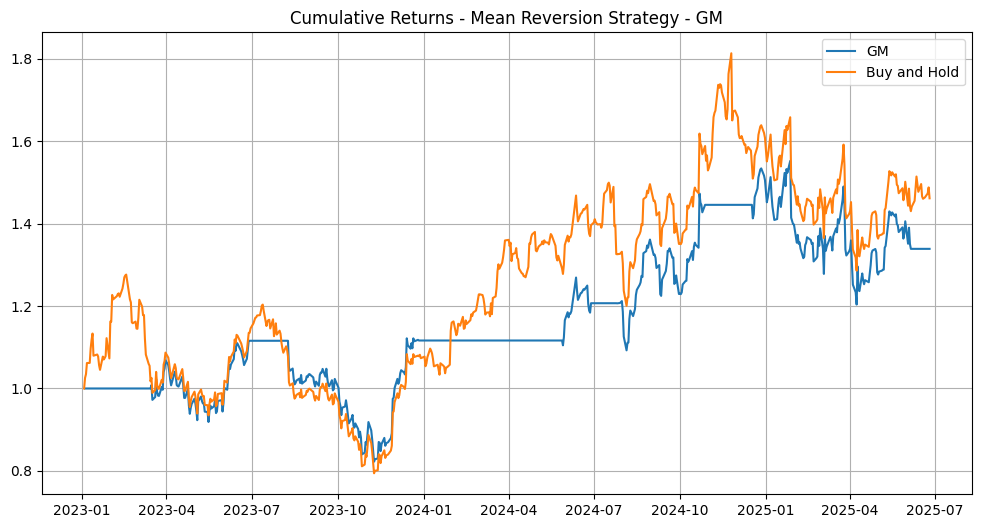

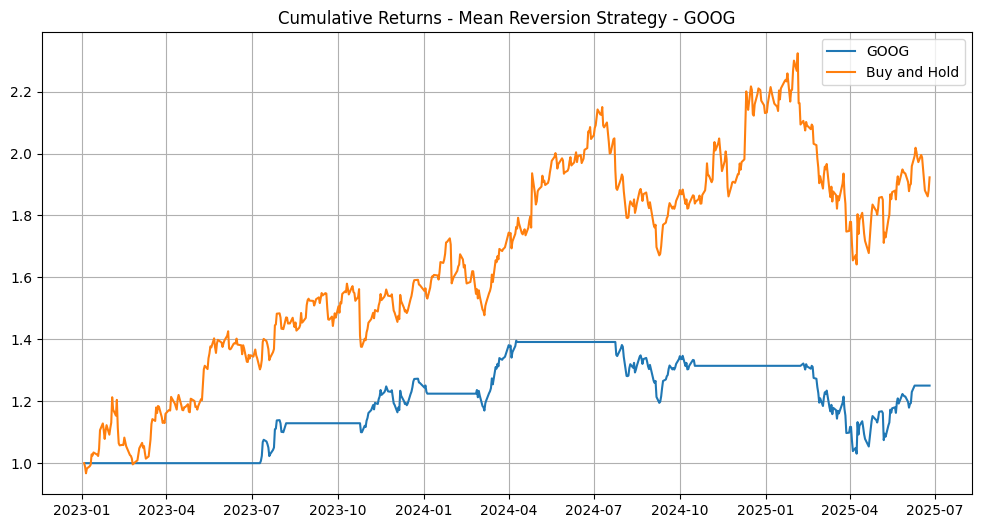

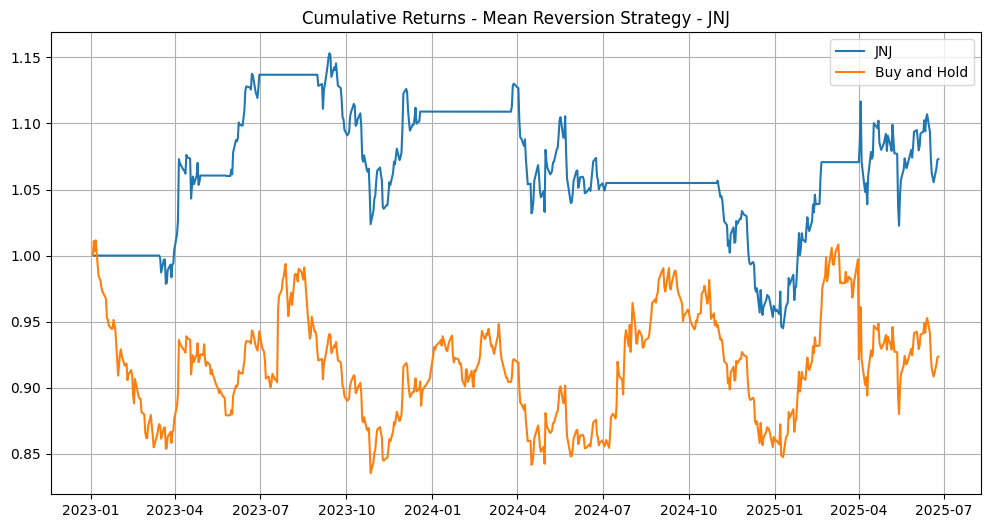

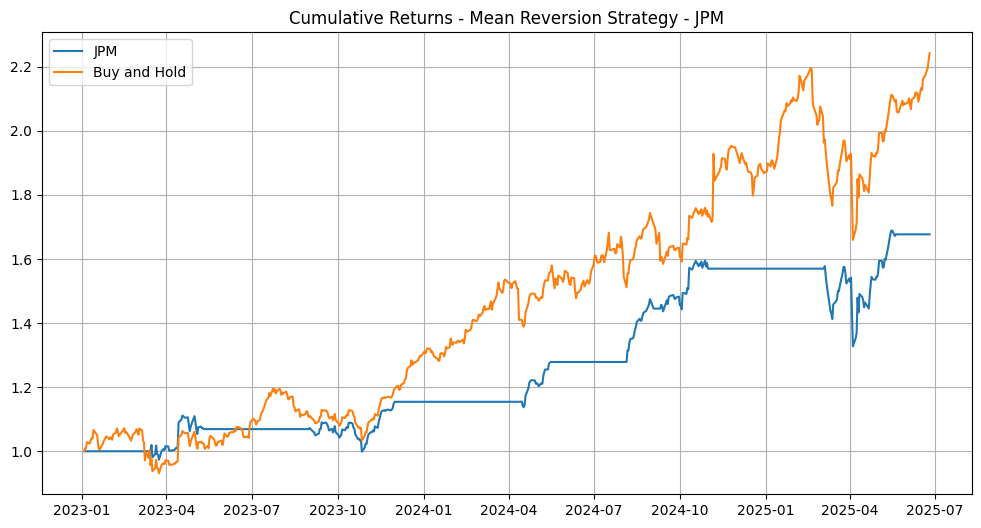

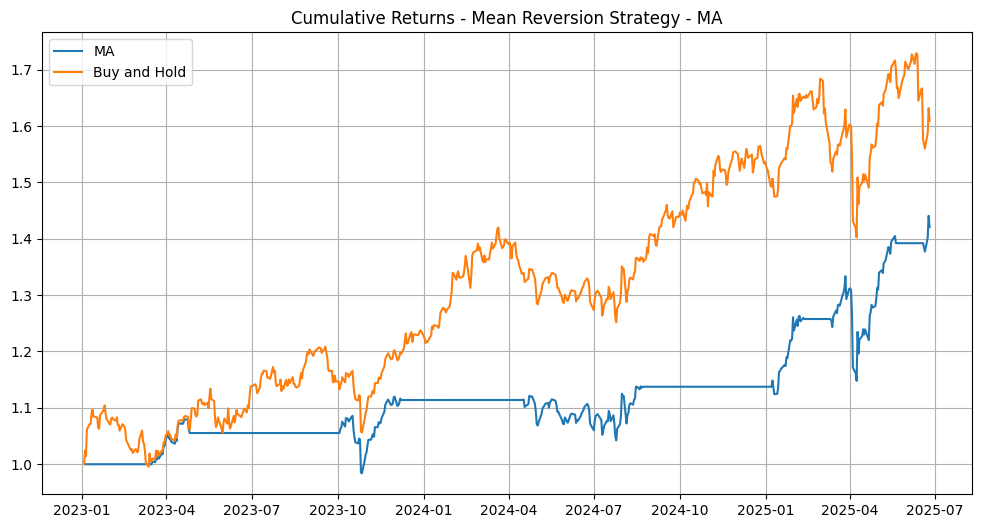

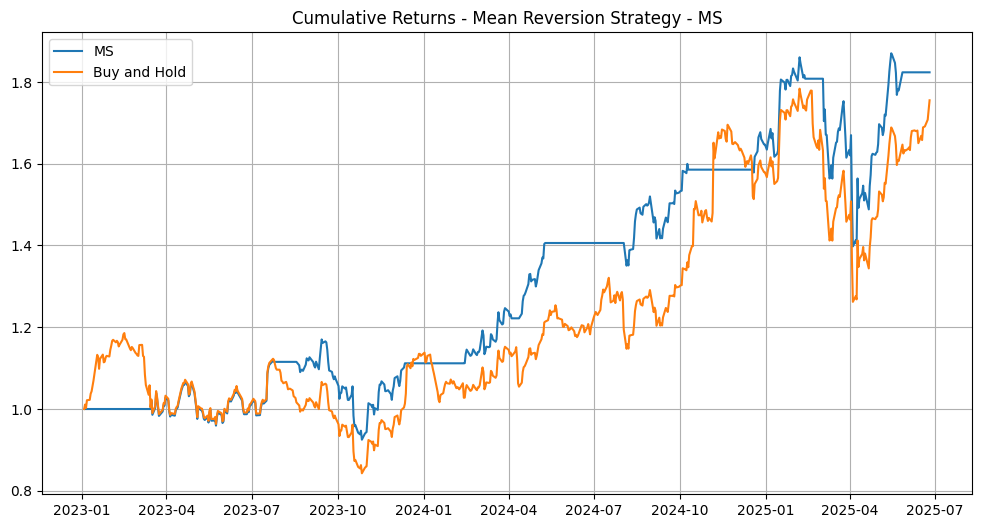

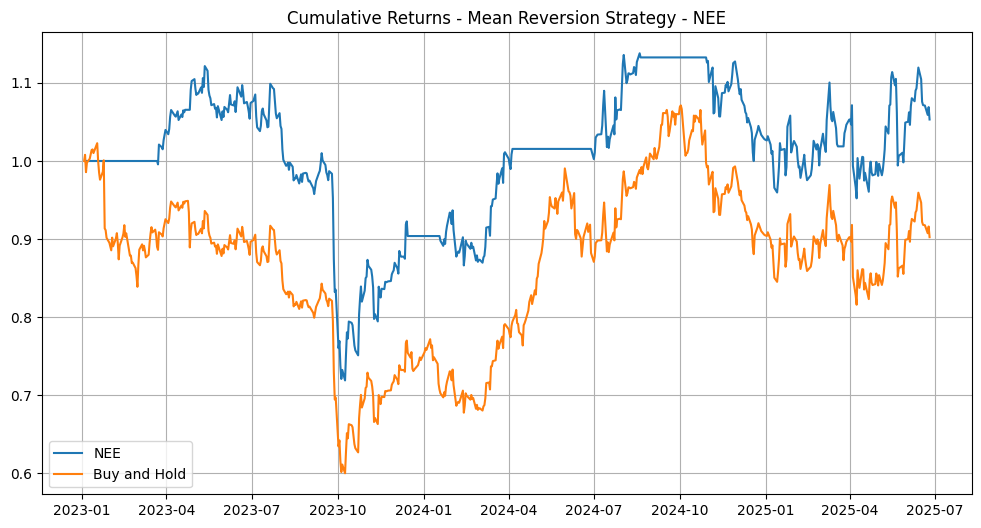

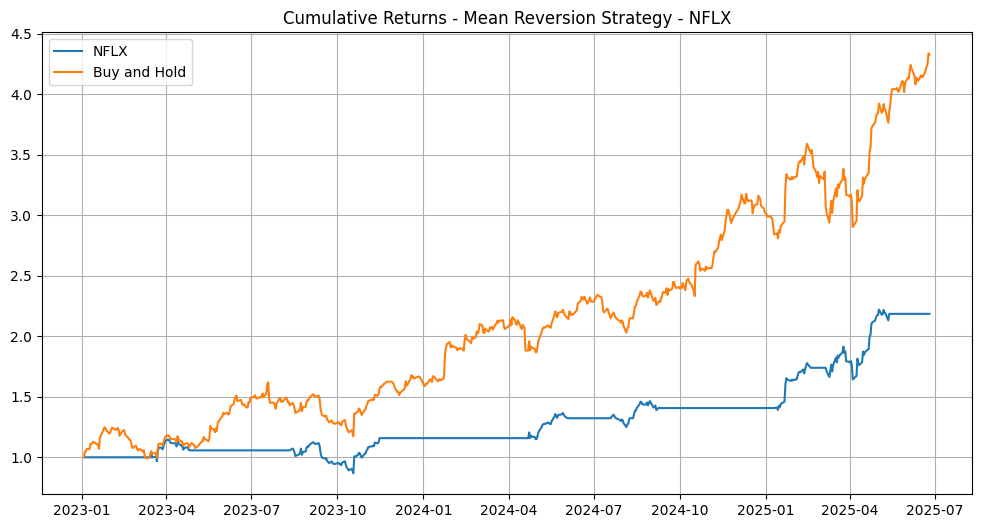

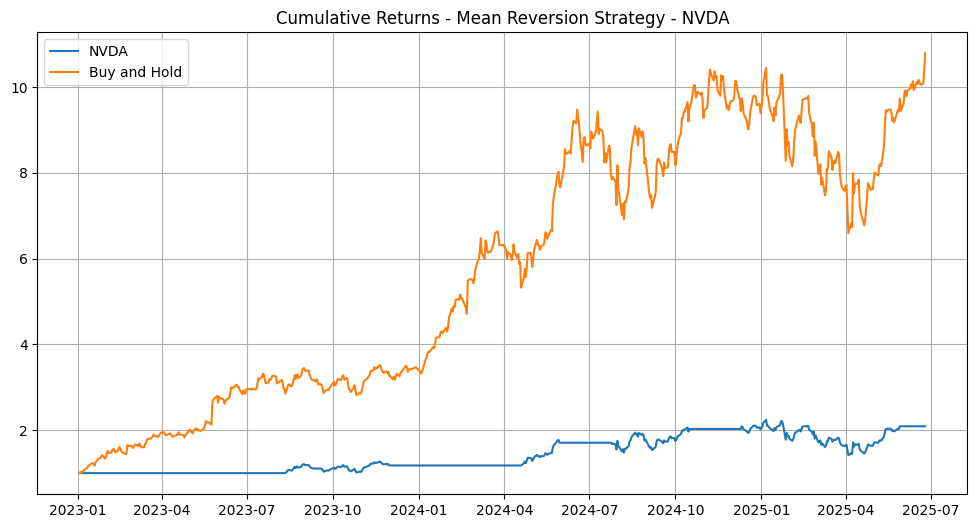

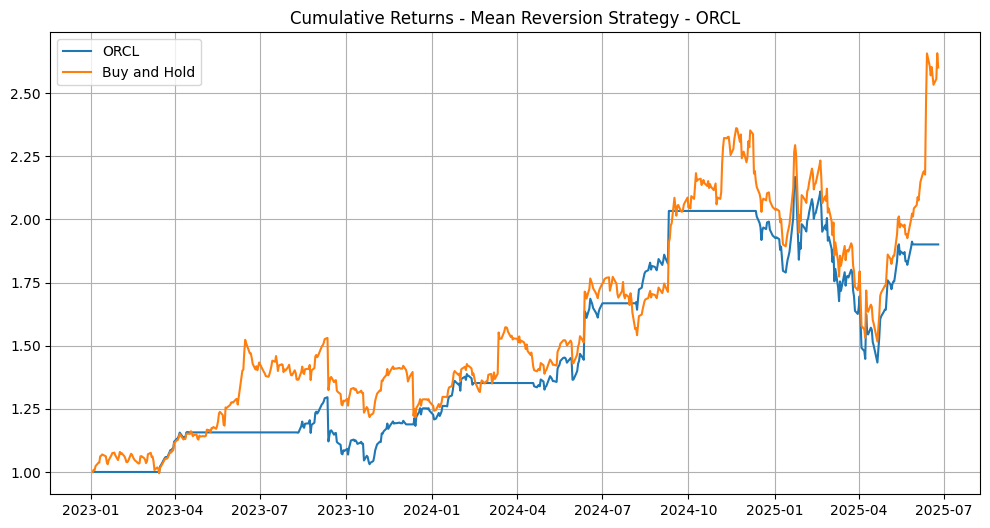

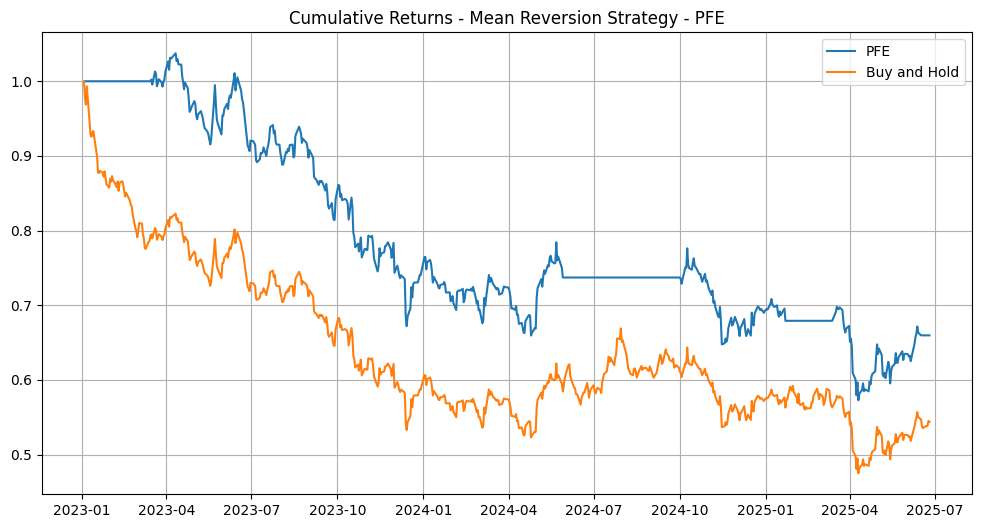

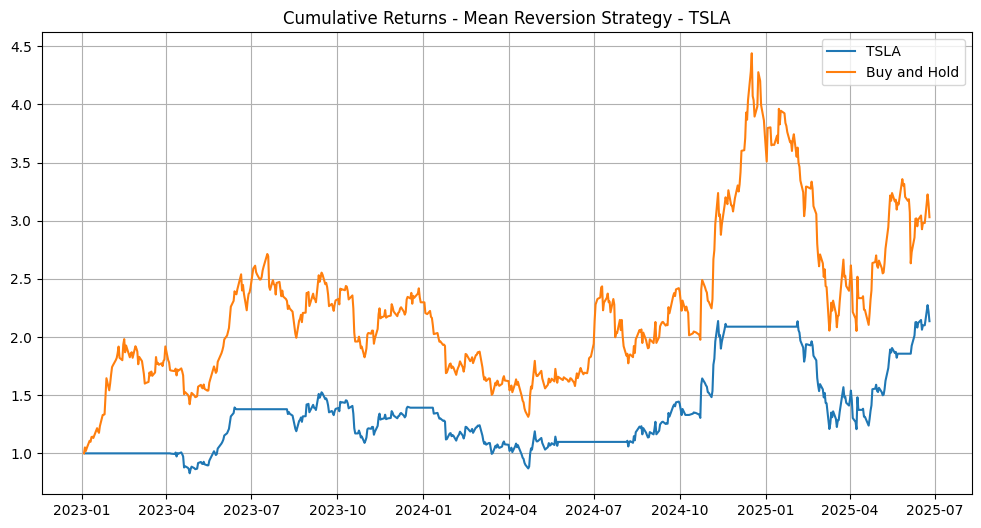

In [ ]:
import pandas as pd
from datetime import date
import matplotlib.pyplot as plt
import yfinance as yf

start = "2023-01-01"
end = date.today()

window_size = 50
holding_period = 20
threshold = 0.98

tickers = ["CAT","CVX","DIS","GM","GOOG","JNJ","JPM","MA","MS","NEE","NFLX","NVDA","ORCL","PFE","TSLA"]
his_data = yf.download(tickers, start, end, interval="1d")["Close"]
# "CVX","DIS","GM","GOOG","JNJ","JPM","MA","MS","NEE","NFLX","NVDA","ORCL","PFE","TSLA"

for tkr in tickers:
    price = his_data[tkr]
    rolling_mean = price.rolling(window=window_size).mean()

    signal1 = (price < (threshold * rolling_mean))
    positions = pd.Series(0, index=price.index)

    for i in range(len(signal1)):
        if signal1.iloc[i]:
            positions.iloc[i:i+holding_period] = 1

    daily_returns = price.pct_change().fillna(0)
    mrv_returns = positions.shift(1) * daily_returns
    cumulative_mrv_return = (1+mrv_returns).cumprod()
    cumulative_market = (1 + daily_returns).cumprod()

    plt.figure(figsize=(12,6))
    plt.plot(cumulative_mrv_return, label=tkr)
    plt.plot(cumulative_market, label="Buy and Hold")
    plt.title("Cumulative Returns - Mean Reversion Strategy - " + str(tkr))
    plt.legend()
    plt.grid(True)
    plt.show()


# Momentum Strategy

/tmp/ipython-input-5-532058501.py:13: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(tickers, start=start, end=end)["Close"]
[*********************100%***********************]  15 of 15 completed
/tmp/ipython-input-5-532058501.py:21: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  signals = pd.DataFrame(index=momentum.index, columns=momentum.columns).fillna(0)
/tmp/ipython-input-5-532058501.py:28: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  daily_returns = prices.pct_change().shift(-1)
/tmp/ipython-input-5-532058501.py:3

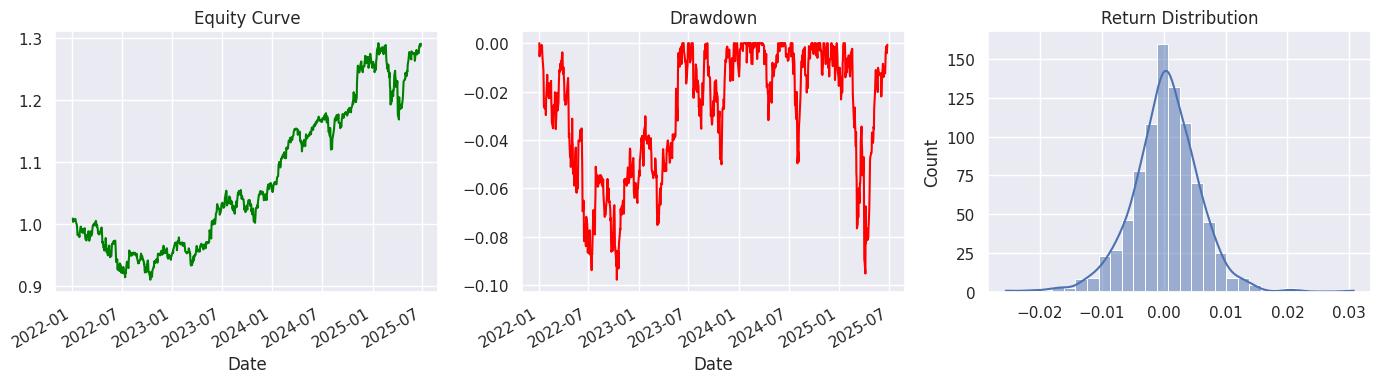

Total Return: 0.2908
Annualized Volatility: 0.0860
Sharpe Ratio: 0.8994
Max Drawdown: -0.0979
Win Rate: 0.5407
Average Trade Return: 0.0003
Volatility: 0.0054


In [ ]:
!pip install yfinance pandas matplotlib seaborn --quiet

import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style="darkgrid")
pd.set_option('display.float_format', '{:.4f}'.format)

def get_price_data(tickers, start="2022-01-01", end=None):
    data = yf.download(tickers, start=start, end=end)["Close"]
    return data

def calculate_momentum(prices, lookback=126, skip_recent=21):
    momentum = (prices.shift(skip_recent) - prices.shift(lookback + skip_recent)) / prices.shift(lookback + skip_recent)
    return momentum

def generate_signals(momentum, top_n=5):
    signals = pd.DataFrame(index=momentum.index, columns=momentum.columns).fillna(0)
    for date in momentum.index:
        top = momentum.loc[date].nlargest(top_n).index
        signals.loc[date, top] = 1
    return signals

def simulate_strategy(signals, prices):
    daily_returns = prices.pct_change().shift(-1)
    strategy_returns = (signals * daily_returns).mean(axis=1)
    return strategy_returns.dropna()

def calculate_kpis(strategy_returns):
    cumulative = (1 + strategy_returns).cumprod()
    peak = cumulative.cummax()
    drawdown = (cumulative - peak) / peak
    kpis = {
        "Total Return": cumulative[-1] - 1,
        "Annualized Volatility": strategy_returns.std() * np.sqrt(252),
        "Sharpe Ratio": strategy_returns.mean() / strategy_returns.std() * np.sqrt(252),
        "Max Drawdown": drawdown.min(),
        "Win Rate": (strategy_returns > 0).mean(),
        "Average Trade Return": strategy_returns.mean(),
        "Volatility": strategy_returns.std()
    }
    return kpis, cumulative, drawdown

def plot_results(cumulative_returns, drawdown, strategy_returns):
    plt.figure(figsize=(14, 4))
    plt.subplot(1, 3, 1)
    cumulative_returns.plot(title="Equity Curve", color="green")
    plt.subplot(1, 3, 2)
    drawdown.plot(title="Drawdown", color="red")
    plt.subplot(1, 3, 3)
    sns.histplot(strategy_returns, bins=30, kde=True)
    plt.title("Return Distribution")
    plt.tight_layout()
    plt.show()

tickers = ["CAT","CVX","DIS","GM","GOOG","JNJ","JPM","MA","MS","NEE","NFLX","NVDA","ORCL","PFE","TSLA"]
start_date = "2022-01-01"

prices = get_price_data(tickers, start=start_date)
momentum_scores = calculate_momentum(prices)
signals = generate_signals(momentum_scores)
strategy_returns = simulate_strategy(signals, prices)
kpis, cumulative_returns, drawdown = calculate_kpis(strategy_returns)
plot_results(cumulative_returns, drawdown, strategy_returns)

for k, v in kpis.items():
    print(f"{k}: {v:.4f}")



# Factor-based Strategy

/tmp/ipython-input-44-306510795.py:13: FutureWarning: YF.download() has changed argument auto_adjust default to True
  his_data = yf.download(tickers, start=start, end=end, interval="1d")["Close"]
[*********************100%***********************]  15 of 15 completed


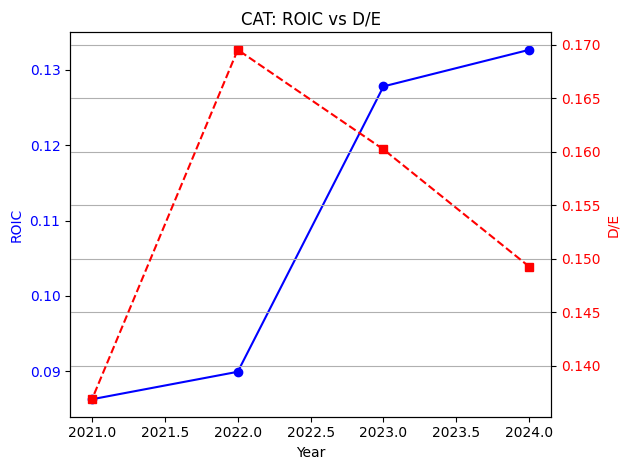

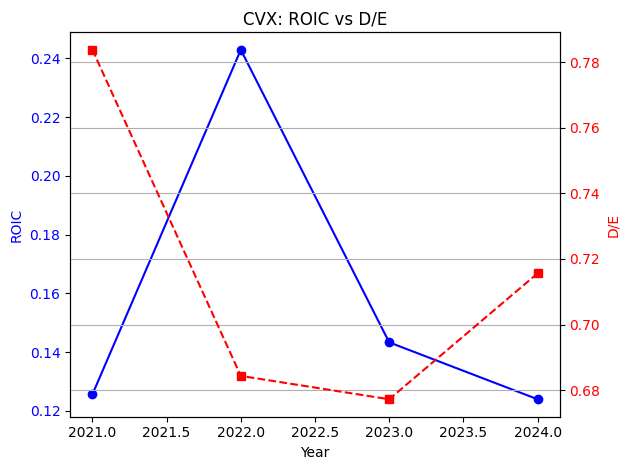

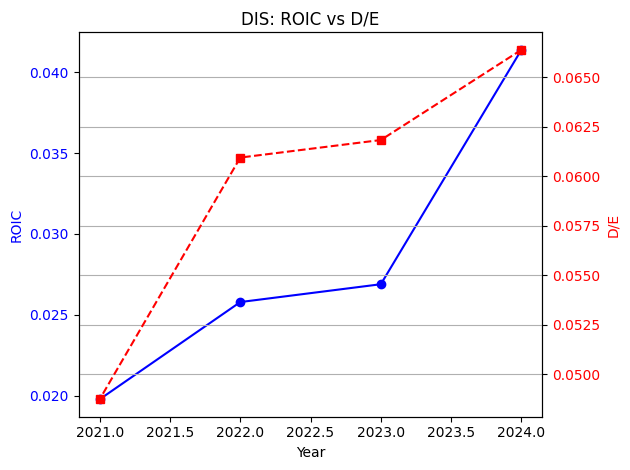

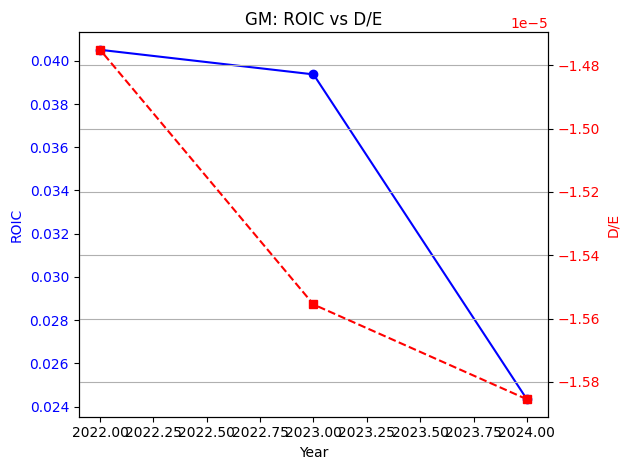

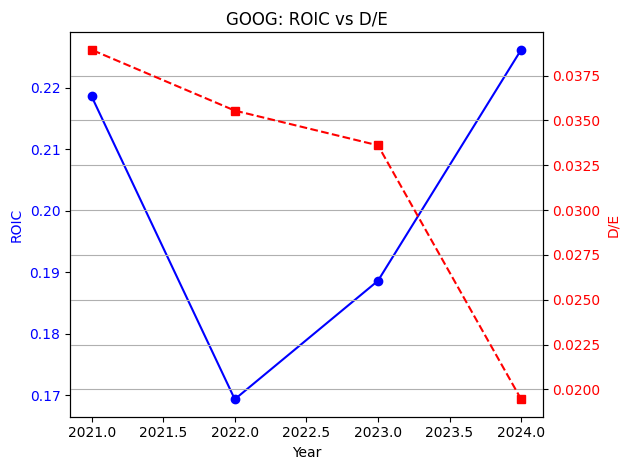

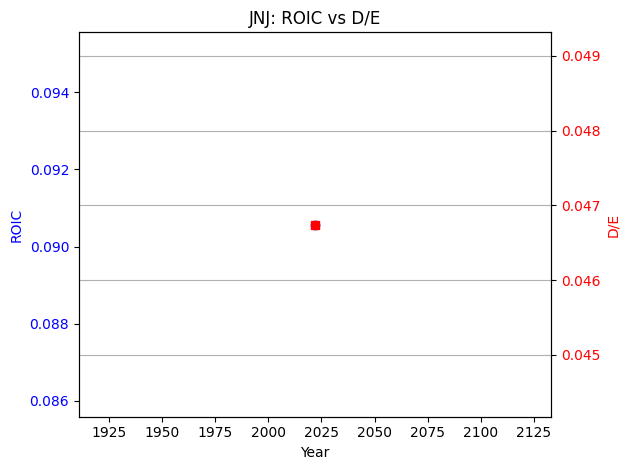

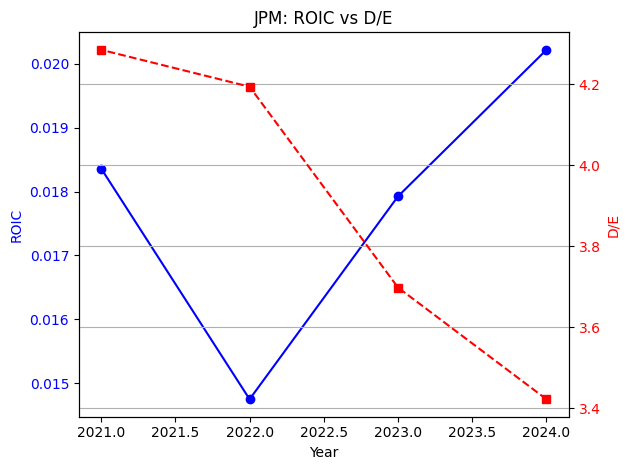

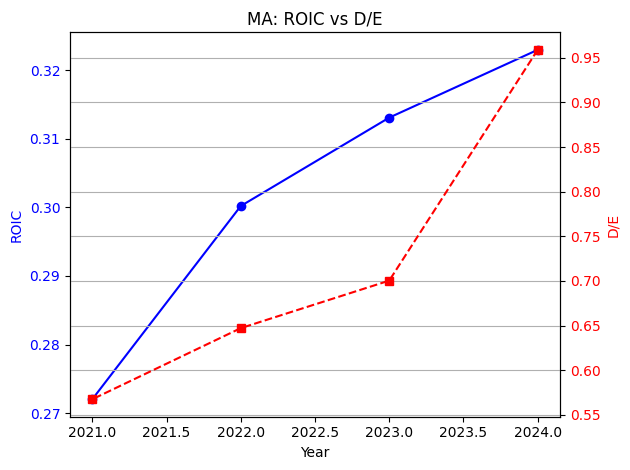

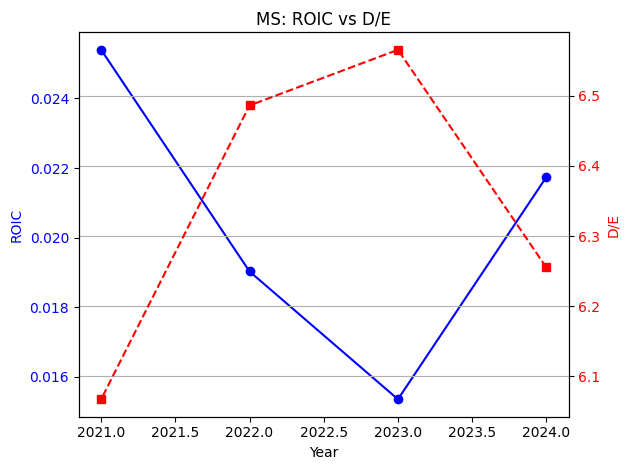

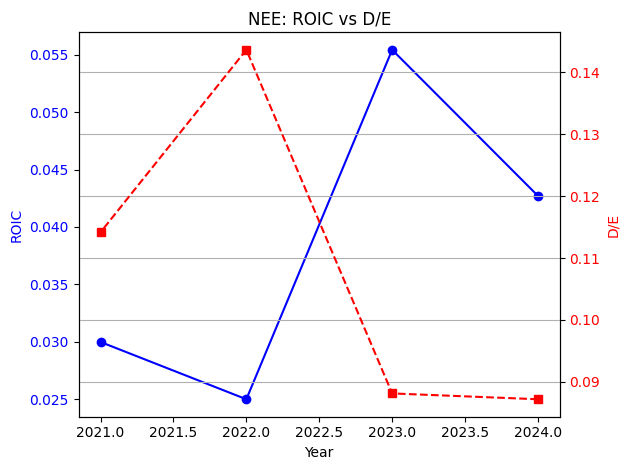

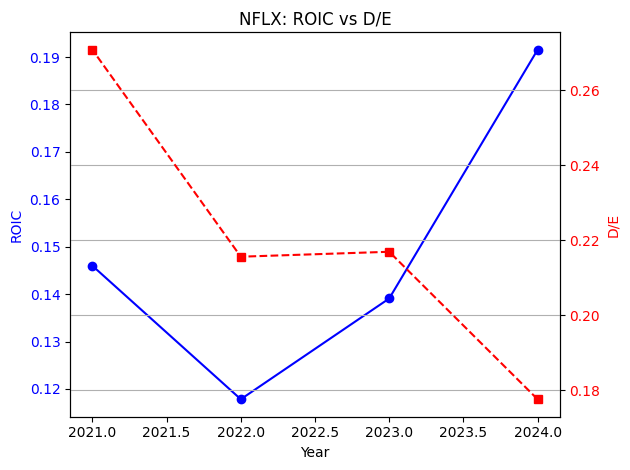

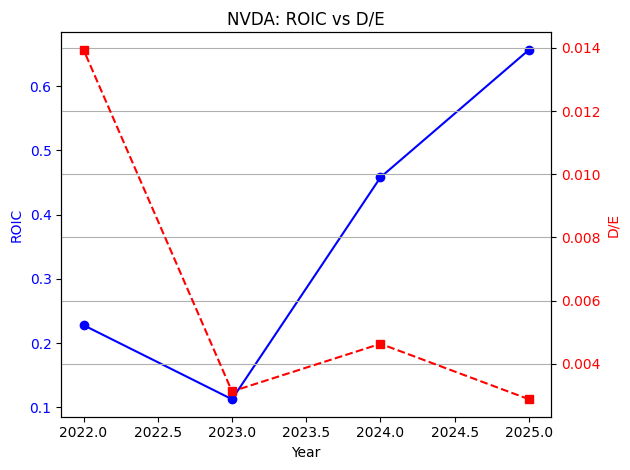

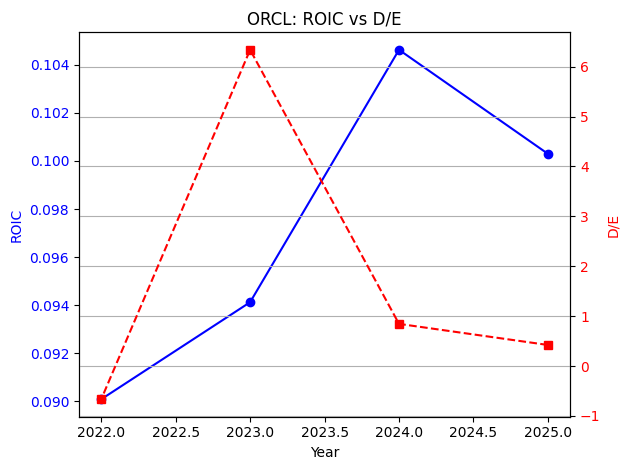

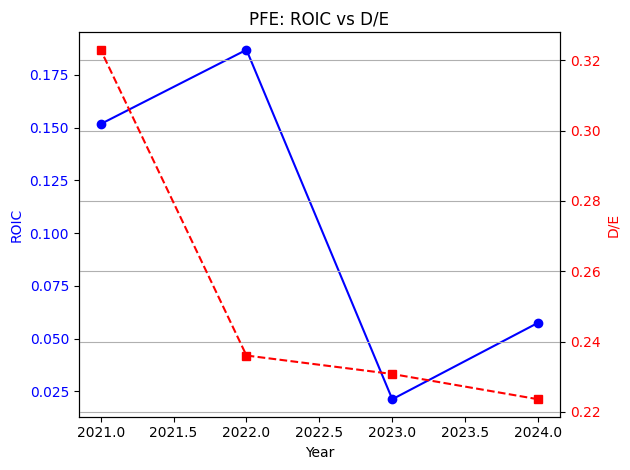

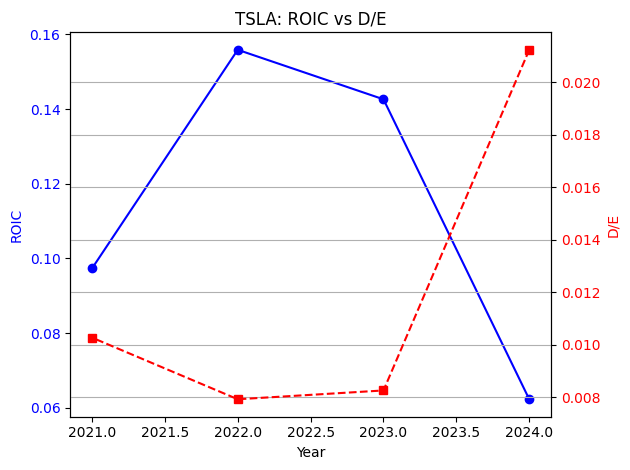

In [ ]:
import yfinance as yf
import pandas as pd
from datetime import datetime, date
import matplotlib.pyplot as plt

pd.set_option('future.no_silent_downcasting', True)

start = "2023-01-01"
end = date.today()

tickers = ["CAT", "CVX", "DIS", "GM", "GOOG", "JNJ", "JPM", "MA", "MS", "NEE", "NFLX", "NVDA", "ORCL", "PFE", "TSLA"]

his_data = yf.download(tickers, start=start, end=end, interval="1d")["Close"]

all_metrics = {}

for tkr in tickers:
    price = his_data[tkr]
    returns = price.pct_change()
    daily_volatility = returns.std()
    annual_volatility = daily_volatility * (252 ** 0.5)
    all_metrics[tkr]["volatility"] = annual_volatility


for tkr in tickers:
    all_metrics.setdefault(tkr, {})

    ticker_obj = yf.Ticker(tkr)
    income_statement = ticker_obj.financials
    balance_sheet = ticker_obj.balance_sheet

    all_metrics[tkr] = {}

    if "Total Assets" in balance_sheet.index:
        all_metrics[tkr]["total_assets"] = balance_sheet.loc["Total Assets"]
    else :
        all_metrics[tkr]["total_assets"] = None
        print(f"Missing data for {tkr}: 'Total Assets'")

    if "EBIT" in income_statement.index:
        all_metrics[tkr]["ebit"] = income_statement.loc["EBIT"]
    elif "Operating Income" in income_statement.index:
        all_metrics[tkr]["ebit"] = income_statement.loc["Operating Income"]
    elif "Earnings Before Tax" in income_statement.index:
        all_metrics[tkr]["ebit"] = income_statement.loc["Earnings Before Tax"]
    elif "Pretax Income" in income_statement.index:
        all_metrics[tkr]["ebit"] = income_statement.loc["Pretax Income"]
    elif "Income Before Tax" in income_statement.index:
        all_metrics[tkr]["ebit"] = income_statement.loc["Income Before Tax"]
    else:
        all_metrics[tkr]["ebit"] = None
        print(f"Missing data for {tkr}: 'EBIT'")

    if "Income Tax Expense" in income_statement.index:
        all_metrics[tkr]["income_tax"] = income_statement.loc["Income Tax Expense"]
    elif "Provision for Income Taxes" in income_statement.index:
        all_metrics[tkr]["income_tax"] = income_statement.loc["Provision for Income Taxes"]
    elif "Tax Provision" in income_statement.index:
        all_metrics[tkr]["income_tax"] = income_statement.loc["Tax Provision"]
    elif "Income Taxes Paid" in income_statement.index:
        all_metrics[tkr]["income_tax"] = income_statement.loc["Income Taxes Paid"]
    elif "Income Tax" in income_statement.index:
        all_metrics[tkr]["income_tax"] = income_statement.loc["Income Tax"]
    else:
        all_metrics[tkr]["income_tax"] = None
        print(f"Missing data for {tkr}: 'Income_Tax'")

    if "Total Stockholder Equity" in balance_sheet.index:
        all_metrics[tkr]["stockholders_equity"] = balance_sheet.loc["Total Stockholder"]
    elif "Common Stock Equity" in balance_sheet.index:
        all_metrics[tkr]["stockholders_equity"] = balance_sheet.loc["Common Stock Equity"]
    elif "Total Shareholder Equity" in balance_sheet.index:
        all_metrics[tkr]["stockholders_equity"] = balance_sheet.loc["Total Shareholders Equity"]
    elif "Total Equity" in balance_sheet.index:
        all_metrics[tkr]["stockholders_equity"] = balance_sheet.loc["Total Equity"]
    else:
        all_metrics[tkr]["stockholders_equity"] = None
        print(f"Missing data for {tkr}: 'Total Stockholder Equity'")

    if "Current Liabilities" in income_statement.index:
        all_metrics[tkr]["current_liabilities"] = income_statement.loc["Current Liabilities"]
    elif "Total Current Liabilities" in income_statement.index:
        all_metrics[tkr]["current_liabilities"] = income_statement.loc["Total Current Liabilities"]
    elif "Other Current Liabilities" in balance_sheet.index:
        all_metrics[tkr]["current_liabilities"] = balance_sheet.loc["Other Current Liabilities"]
    else:
        fallback_fields = [
            'Current Debt',
            'Current Debt And Capital Lease Obligation',
            'Current Capital Lease Obligation',
            'Other Current Borrowings',
            'Payables And Accrued Expenses',
            'Current Accrued Expenses',
            'Accounts Payable',
            'Total Tax Payable',
            'Income Tax Payable',
            'Commercial Paper',
            'Payables',
            'Other Payable'
        ]

        recent_bs = balance_sheet.iloc[:, 0].fillna(0).infer_objects(copy=False)
        values = [recent_bs.get(field, 0) for field in fallback_fields]
        current_liab_sum = sum(values)

        if current_liab_sum > 0:
            all_metrics[tkr]["current_liabilities"] = current_liab_sum
        else:
            all_metrics[tkr]["current_liabilities"] = None
            print(f"Missing data for {tkr}: 'Current Liabilities'")


for tkr in tickers:
    all_metrics[tkr]["roic"] = (all_metrics[tkr]["ebit"] - all_metrics[tkr]["income_tax"])/(all_metrics[tkr]["total_assets"] - all_metrics[tkr]["current_liabilities"])
    all_metrics[tkr]["de"] = all_metrics[tkr]["current_liabilities"] / all_metrics[tkr]["stockholders_equity"]

for tkr in tickers:

  max_de = 3
  max_roic = 0.20

  de = all_metrics[tkr]["de"]
  roic = all_metrics[tkr]["roic"]

  scaled_de = 5 * (1 - de/max_de)
  scaled_roic = 5 * (roic)/(max_roic)


  company_health = scaled_de + scaled_roic
  all_metrics[tkr]["company_health"] = min(company_health, 10) # limits company health to 10


for tkr in tickers:
  roic_series = all_metrics[tkr].get('roic')
  de_series = all_metrics[tkr].get('de')

  if roic_series is None or de_series is None:
      print(f"No graph for {tkr}, missing ROIC or D/E.")
      continue

  if not pd.api.types.is_datetime64_any_dtype(roic_series.index):
        roic_series.index = pd.to_datetime(roic_series.index)
  if not pd.api.types.is_datetime64_any_dtype(de_series.index):
      de_series.index = pd.to_datetime(de_series.index)


  roic_years = roic_series.index.year
  de_years = de_series.index.year

  fig, ax1 = plt.subplots()

  # Plot ROIC (blue)
  ax1.set_xlabel("Year")
  ax1.set_ylabel("ROIC", color="blue")
  ax1.plot(roic_years, roic_series.values, color="blue", marker="o", label="ROIC")
  ax1.tick_params(axis="y", labelcolor="blue")

  # Plot D/E (red)
  ax2 = ax1.twinx()
  ax2.set_ylabel("D/E", color="red")
  ax2.plot(de_years, de_series.values, color="red", marker="s", linestyle="--", label="D/E")
  ax2.tick_params(axis="y", labelcolor="red")

  plt.title(f"{tkr}: ROIC vs D/E")
  plt.grid(True)
  plt.tight_layout()
  plt.show()

# Strategy Integration

/tmp/ipython-input-1-3902907283.py:36: FutureWarning: YF.download() has changed argument auto_adjust default to True
  full_data_1 = yf.download(tickers, start=start_date.strftime("%Y-%m-%d"), end=today.strftime("%Y-%m-%d"), interval="1d", threads=False)["Close"]
[*********************100%***********************]  15 of 15 completed


Cycle 1 skipped due to no valid signals.
Cycle 2 skipped due to no valid signals.
Cycle 3 skipped due to no valid signals.

=== CYCLE RETURNS ===
Cycle 1: ⚠️  No trades / skipped.
Cycle 2: ⚠️  No trades / skipped.
Cycle 3: ⚠️  No trades / skipped.
Cycle  4: Start $100,000  →  End $97,101  |  Cycle Return -2.90%  |  Cumulative   -2.90%
Cycle  5: Start $97,101  →  End $96,686  |  Cycle Return -0.43%  |  Cumulative   -3.31%
Cycle  6: Start $96,686  →  End $98,816  |  Cycle Return  2.20%  |  Cumulative   -1.18%
Cycle  7: Start $98,816  →  End $102,378  |  Cycle Return  3.60%  |  Cumulative    2.38%
Cycle  8: Start $102,378  →  End $99,339  |  Cycle Return -2.97%  |  Cumulative   -0.66%
Cycle  9: Start $99,339  →  End $97,404  |  Cycle Return -1.95%  |  Cumulative   -2.60%
Cycle 10: Start $97,404  →  End $102,743  |  Cycle Return  5.48%  |  Cumulative    2.74%
Cycle 11: Start $102,743  →  End $116,352  |  Cycle Return 13.24%  |  Cumulative   16.35%
Cycle 12: Start $116,352  →  End $113,242 

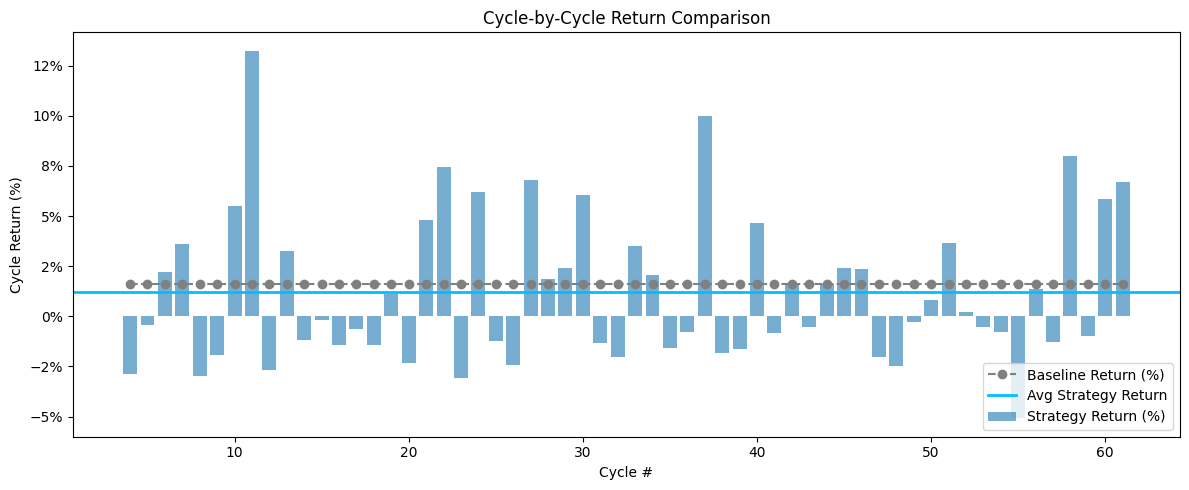

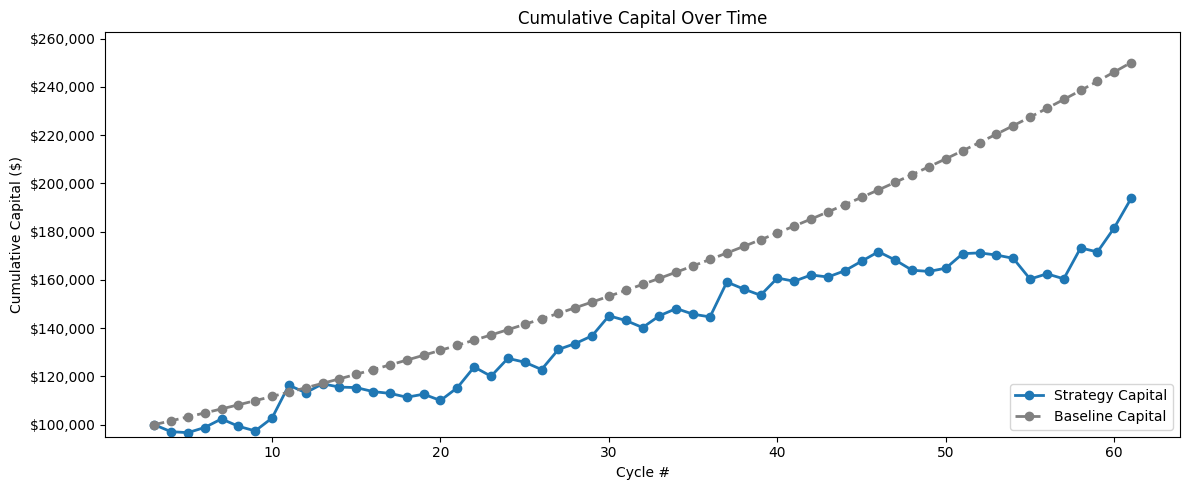

In [1]:
#setup
import yfinance as yf
import pandas as pd
from datetime import datetime, timedelta, date
import matplotlib.pyplot as plt
import numpy as np

tickers = ["CAT", "CVX", "DIS", "GM", "GOOG", "JNJ", "JPM", "MA", "MS", "NEE", "NFLX", "NVDA", "ORCL", "PFE", "TSLA"]

n = 1
total_capital = {"cycle": {"1": 100_000}} # not sure on number
profit = {"cycle": {}}
returns = {"cycle": {}}
value_after_investment = {"cycle": {}}

cooldown_stocks = {}
cooldown_threshold = 0.02
last_pnl = {t: 0.0 for t in tickers}
last_capital = {t: 0.0 for t in tickers}


all_metrics = {}
portfolio_value = [1]
avg_market_returns = [1]

window_size = 20
span = 5

start_date = datetime.strptime("2023-01-01", "%Y-%m-%d")
holding_period = 15
current_start = start_date
current_end = current_start + timedelta(days=holding_period)

today = datetime.today()

full_data_1 = yf.download(tickers, start=start_date.strftime("%Y-%m-%d"), end=today.strftime("%Y-%m-%d"), interval="1d", threads=False)["Close"]
full_data = full_data_1.dropna(how="all")

for tkr in tickers:
    all_metrics.setdefault(tkr, {})

    ticker_obj = yf.Ticker(tkr)
    income_statement = ticker_obj.financials
    balance_sheet = ticker_obj.balance_sheet

#loop for every investment cycle (separated by 20 days, the holding period)
while current_end <= today:
    final_signals = {}
    cycle_key = str(n)

    lookback_buffer = 200  # you need at least 126 + 50 days
    historical_start = current_start - timedelta(days=lookback_buffer)
    effective_start = max(start_date, historical_start)

    his_data = full_data.loc[effective_start:current_start - timedelta(days=1)]

    daily_returns = {}
    daily_pct = {}

    for tkr in tickers:
        pct = his_data[tkr].pct_change().dropna()
        if len(pct) >= span:                      # we have enough data
            daily_returns[tkr] = pct.ewm(span=span).mean().iloc[-1]

    #mean reversion - if stock goes below 98% avg value

    for tkr in tickers:
        threshold = 0.975
        price = his_data[tkr].dropna()

        if len(price) < window_size:
              continue  # skip this ticker for this cycle due to insufficient data

        rolling_mean = price.rolling(window=window_size, min_periods=window_size).mean()

        # rolling_mean may have NaNs in the first (window_size-1) entries, so get last valid index
        if pd.isna(rolling_mean.iloc[-1]):
            continue  # not enough data for rolling mean at last date
        last_trade_loss = last_pnl.get(tkr, 0.0)

        # NOTE: Only trigger cooldown if there was a trade last cycle
        loss = last_pnl.get(tkr, 0.0)
        cap  = last_capital.get(tkr, None)
        loss_threshold = -0.07

        if tkr in cooldown_stocks:
            cooldown_start_price = full_data[tkr].loc[current_start]
            recent_price = full_data[tkr].loc[current_end]
            cooldown_return = recent_price / cooldown_stocks[tkr] - 1
            if cooldown_return < cooldown_threshold:
                continue  # stay in cooldown
            else:
                del cooldown_stocks[tkr]  # recovered

        if loss < 0 and cap:
            if loss / cap < loss_threshold:
                continue

        if price.iloc[-1] < (threshold * rolling_mean.iloc[-1]) :
            profitability_score = max(0, min(10, (2 * (1 - (price.iloc[-1]/rolling_mean.iloc[-1])))))
            final_signals.setdefault(tkr, {})
            final_signals[tkr]["signal"] = "Buy"
            final_signals[tkr].setdefault("profitability_scores", []).append(profitability_score)
        else:
            continue

    #momentum - top 5 stocks
    def calculate_momentum(prices, lookback=40, skip_recent=5):
        returns = np.log(prices.shift(skip_recent) / prices.shift(lookback + skip_recent))
        zscore = (returns - returns.mean()) / returns.std()
        return zscore

    momentum_scores = calculate_momentum(his_data)

    momentum_ranking = {}
    for tkr in tickers:
        # NOTE: Only trigger cooldown if there was a trade last cycle
        loss = last_pnl.get(tkr, 0.0)
        cap  = last_capital.get(tkr, None)
        loss_threshold = -0.07

        if tkr in cooldown_stocks:
            cooldown_start_price = full_data[tkr].loc[current_start]
            recent_price = full_data[tkr].loc[current_end]
            cooldown_return = recent_price / cooldown_stocks[tkr] - 1
            if cooldown_return < cooldown_threshold:
                continue  # stay in cooldown
            else:
                del cooldown_stocks[tkr]  # recovered

        if loss < 0 and cap:
            if loss / cap < loss_threshold:
                continue

        score_series = momentum_scores[tkr]
        if not score_series.empty and pd.notna(score_series.iloc[-1]):
            momentum_score = score_series.iloc[-1]
            momentum_ranking[tkr] = momentum_score

    top_5_momentum = sorted(momentum_ranking.items(), key=lambda x: x[1], reverse=True)[:5]

    for tkr, score in top_5_momentum:
        profitability_score = max(0, min(90 * score, 10))
        final_signals.setdefault(tkr, {})
        final_signals[tkr]["signal"] = "Buy"
        final_signals[tkr].setdefault("profitability_scores", []).append(profitability_score)

    #company health
    for tkr in tickers:
        start_date = pd.Timestamp("2023-01-01")
        loop_end_date = pd.Timestamp(current_end)

        valid_income_cols = [col for col in income_statement.columns if start_date <= col <= loop_end_date]
        valid_balance_cols = [col for col in balance_sheet.columns if start_date <= col <= loop_end_date]

        if valid_income_cols:
            filtered_income = income_statement[valid_income_cols]
            latest_income_col = max(valid_income_cols)
            latest_income = filtered_income[latest_income_col]
        else:
            latest_income = None

        if valid_balance_cols:
            filtered_balance = balance_sheet[valid_balance_cols]
            latest_balance_col = max(valid_balance_cols)
            latest_balance = filtered_balance[latest_balance_col]
        else:
            latest_balance = None

        all_metrics[tkr] = {}

        if latest_income is not None:
            if "EBIT" in latest_income.index:
                all_metrics[tkr]["ebit"] = latest_income["EBIT"]
            elif "Operating Income" in latest_income.index:
                all_metrics[tkr]["ebit"] = latest_income["Operating Income"]
            elif "Earnings Before Tax" in latest_income.index:
                all_metrics[tkr]["ebit"] = latest_income["Earnings Before Tax"]
            elif "Pretax Income" in latest_income.index:
                all_metrics[tkr]["ebit"] = latest_income["Pretax Income"]
            elif "Income Before Tax" in latest_income.index:
                all_metrics[tkr]["ebit"] = latest_income["Income Before Tax"]
            else:
                all_metrics[tkr]["ebit"] = None
        else:
            all_metrics[tkr]["ebit"] = None

        if latest_income is not None:
            if "Income Tax Expense" in latest_income.index:
                all_metrics[tkr]["income_tax"] = latest_income["Income Tax Expense"]
            elif "Provision for Income Taxes" in latest_income.index:
                all_metrics[tkr]["income_tax"] = latest_income["Provision for Income Taxes"]
            elif "Tax Provision" in latest_income.index:
                all_metrics[tkr]["income_tax"] = latest_income["Tax Provision"]
            elif "Income Taxes Paid" in latest_income.index:
                all_metrics[tkr]["income_tax"] = latest_income["Income Taxes Paid"]
            elif "Income Tax" in latest_income.index:
                all_metrics[tkr]["income_tax"] = latest_income["Income Tax"]
            else:
                all_metrics[tkr]["income_tax"] = None
        else:
            all_metrics[tkr]["income_tax"] = None

        if latest_balance is not None:
            if "Total Assets" in latest_balance.index:
                all_metrics[tkr]["total_assets"] = latest_balance["Total Assets"]
            else:
                all_metrics[tkr]["total_assets"] = None
        else:
            all_metrics[tkr]["total_assets"] = None

        if latest_balance is not None:
            if "Total Stockholder Equity" in latest_balance.index:
                all_metrics[tkr]["stockholders_equity"] = latest_balance["Total Stockholder Equity"]
            elif "Common Stock Equity" in latest_balance.index:
                all_metrics[tkr]["stockholders_equity"] = latest_balance["Common Stock Equity"]
            elif "Total Shareholder Equity" in latest_balance.index:
                all_metrics[tkr]["stockholders_equity"] = latest_balance["Total Shareholder Equity"]
            elif "Total Equity" in latest_balance.index:
                all_metrics[tkr]["stockholders_equity"] = latest_balance["Total Equity"]
            else:
                all_metrics[tkr]["stockholders_equity"] = None
        else:
            all_metrics[tkr]["stockholders_equity"] = None

        fallback_fields = [
            'Current Debt',
            'Current Debt And Capital Lease Obligation',
            'Current Capital Lease Obligation',
            'Other Current Borrowings',
            'Payables And Accrued Expenses',
            'Current Accrued Expenses',
            'Accounts Payable',
            'Total Tax Payable',
            'Income Tax Payable',
            'Commercial Paper',
            'Payables',
            'Other Payable'
        ]

        if latest_balance is not None:
            if "Current Liabilities" in latest_balance.index:
                all_metrics[tkr]["current_liabilities"] = latest_balance["Current Liabilities"]
            elif "Total Current Liabilities" in latest_balance.index:
                all_metrics[tkr]["current_liabilities"] = latest_balance["Total Current Liabilities"]
            elif "Other Current Liabilities" in latest_balance.index:
                all_metrics[tkr]["current_liabilities"] = latest_balance["Other Current Liabilities"]
            else:
                values = [latest_balance.get(field, 0) for field in fallback_fields]
                current_liab_sum = sum(values)
                all_metrics[tkr]["current_liabilities"] = current_liab_sum if current_liab_sum > 0 else None
        else:
            all_metrics[tkr]["current_liabilities"] = None

        try:
            ebit = all_metrics[tkr]["ebit"]
            income_tax = all_metrics[tkr]["income_tax"]
            total_assets = all_metrics[tkr]["total_assets"]
            current_liabilities = all_metrics[tkr]["current_liabilities"]
            stockholders_equity = all_metrics[tkr]["stockholders_equity"]

            if None not in (ebit, income_tax, total_assets, current_liabilities, stockholders_equity):
                roic = (ebit - income_tax) / (total_assets - current_liabilities)
                de = current_liabilities / stockholders_equity
            else:
                roic = None
                de = None
        except:
            roic = None
            de = None

        all_metrics[tkr]["roic"] = roic
        all_metrics[tkr]["de"] = de

        max_de = 3
        max_roic = 0.20

        if roic is not None and de is not None:
            scaled_de = 5 * (1 - de / max_de)
            scaled_roic = 5 * (roic) / max_roic
            company_health = scaled_de + scaled_roic
            all_metrics[tkr]["company_health"] = min(company_health, 10)
        else:
            all_metrics[tkr]["company_health"] = 0

    company_health_weight = 0.2
    profitability_weight = 0.8


    for tkr in final_signals:
        if "profitability_scores" not in final_signals[tkr] or not final_signals[tkr]["profitability_scores"]:
            final_signals[tkr]["profitability_scores"] = [0]

    for tkr in final_signals:
        scores = final_signals[tkr].get("profitability_scores", [])
        if scores:
            final_signals[tkr]["profitability"] = sum(scores) / len(scores)

        trade_profitability = final_signals[tkr].get("profitability", 0)

    risk_filtered = {}

    for tkr in final_signals.keys():
        recent_window = his_data[tkr].dropna().iloc[-20:]
        if len(recent_window) < 20:
            continue

        max_dd  = (recent_window / recent_window.cummax() - 1).min()
        vol_20  = recent_window.pct_change().std()

        if max_dd < -0.15 and vol_20 > 0.06:
            continue                       # too risky → skip
        elif max_dd < -0.30 or vol_20 > 0.12:
            continue

        # ---------- composite score (keep **inside** the loop) ----------
        scores = final_signals[tkr].get("profitability_scores", [0])
        ps = sum(scores) / len(scores)
        ch = all_metrics[tkr].get("company_health", 0)
        cs = ch * company_health_weight + ps * profitability_weight

        risk_filtered[tkr] = np.clip(cs, 0, 10)   # store

    # ---------- after the loop, rebuild dict & rank ----------
    final_signals = {tkr: {"composite_score": sc} for tkr, sc in risk_filtered.items()}

    dual_signal_boost = 1.2

    for tkr in final_signals:
        if tkr in [m[0] for m in top_5_momentum]:
            final_signals[tkr]["momentum_signal"] = True
        else:
            final_signals[tkr]["momentum_signal"] = False

        if tkr in final_signals and final_signals[tkr].get("signal") == "Buy":
            if final_signals[tkr]["momentum_signal"]:
                final_signals[tkr]["profitability"] *= dual_signal_boost

    sorted_scores = sorted(
        final_signals.items(),
        key=lambda x: x[1]["composite_score"],
        reverse=True
    )

    num_signals = 10
    used_signals = sorted_scores[:num_signals]
    used_signals_tickers = [tkr for tkr, score in used_signals]
    total_scores = sum(score["composite_score"] for tkr, score in used_signals)

    if not used_signals or total_scores == 0:
        print(f"Cycle {n} skipped due to no valid signals.")
        n += 1
        current_start += timedelta(days=holding_period)
        current_end += timedelta(days=holding_period)
        total_capital["cycle"][str(n)] = total_capital["cycle"][str(n - 1)]
        portfolio_value.append(portfolio_value[-1])
        avg_market_returns.append(avg_market_returns[-1])
        continue

    #profit/results

    if cycle_key not in value_after_investment["cycle"]:
        value_after_investment["cycle"][cycle_key] = {}
    if cycle_key not in profit["cycle"]:
        profit["cycle"][cycle_key] = {}
    if cycle_key not in returns["cycle"]:
        returns["cycle"][cycle_key] = {}

    capital_this_cycle = total_capital["cycle"][cycle_key]
    allocated_capital = {}
    stock_shares = {}

    max_alloc = 0.25
    weights = {}

    for tkr, score in used_signals:
        w = score["composite_score"] / total_scores
        weights[tkr] = min(w, max_alloc)

    total_w = sum(weights.values())
    weights  = {k: v/total_w for k, v in weights.items()}


    stop_loss_pct = 0.98

    for tkr, w in weights.items():
        try:
            start_price = full_data.loc[current_start, tkr]
        except KeyError:
            start_price = full_data[tkr].loc[:current_start].ffill().iloc[-1]

        # Get price series during holding period (inclusive)
        price_series = full_data[tkr].loc[current_start:current_end]

        # Determine if stop loss triggered and when
        stop_price = start_price * stop_loss_pct
        stop_triggered = price_series[price_series <= stop_price]

        if not stop_triggered.empty:
            # Stop triggered: sell at first day price below stop
            stop_day = stop_triggered.index[0]
            exit_price = price_series.loc[stop_day]
        else:
            # No stop triggered, sell at end price
            try:
                exit_price = full_data.loc[current_end, tkr]
            except KeyError:
                exit_price = full_data[tkr].loc[:current_end].ffill().iloc[-1]

        allocated_capital[tkr] = capital_this_cycle * w
        num_shares = allocated_capital[tkr] / start_price
        final_value = num_shares * exit_price

        value_after_investment["cycle"][cycle_key][tkr] = final_value
        profit["cycle"][cycle_key][tkr] = final_value - allocated_capital[tkr]

        last_pnl[tkr]     = profit["cycle"][cycle_key][tkr]
        last_capital[tkr] = allocated_capital[tkr]

    total_final_value = sum(value_after_investment["cycle"][cycle_key][tkr] for tkr in used_signals_tickers)
    profit["cycle"][cycle_key]["total"] = total_final_value - capital_this_cycle
    returns["cycle"][cycle_key]["total"] = profit["cycle"][cycle_key]["total"] / capital_this_cycle

    n += 1
    next_cycle_key = str(n)
    total_capital["cycle"][next_cycle_key] = total_final_value

    portfolio_value.append(total_final_value / total_capital["cycle"]["1"])

    # average return for ALL stocks
    avg_start = his_data.iloc[0].mean()
    avg_end = his_data.iloc[-1].mean()
    avg_cycle_return = avg_end / avg_start
    avg_market_returns.append(avg_market_returns[-1] * avg_cycle_return)

    current_start += timedelta(days=holding_period)
    current_end += timedelta(days=holding_period)

final_capital = total_capital["cycle"][str(n)]
final_returns = (final_capital/total_capital["cycle"]["1"]) - 1
#print (final_capital)
#print (final_returns)

#testing

print("\n=== CYCLE RETURNS ===")

cycles = sorted(total_capital["cycle"].keys(), key=lambda x: int(x))

cum_mult = 1.0                 # running multiplicative return
base_cap = total_capital["cycle"]["1"]

for i in range(len(cycles) - 1):          # last entry has no trades
    ck   = cycles[i]                      # current cycle key as string
    nk   = str(int(ck) + 1)               # next cycle key
    cap0 = total_capital["cycle"][ck]     # starting cap for the cycle
    cap1 = total_capital["cycle"][nk]     # ending cap (after trades)

    if cap0 == cap1:                      # we skipped this cycle
        print(f"Cycle {ck}: ⚠️  No trades / skipped.")
        continue

    cycle_ret = (cap1 - cap0) / cap0      # simple period return
    cum_mult *= (1 + cycle_ret)           # update cumulative multiplier

    print(f"Cycle {ck:>2}: "
          f"Start ${cap0:,.0f}  →  End ${cap1:,.0f}  |  "
          f"Cycle Return {cycle_ret:6.2%}  |  "
          f"Cumulative {cum_mult - 1:8.2%}")

#KPIS

# Convert portfolio_value to numpy array for convenience
port_vals = np.array(portfolio_value)  # cumulative returns starting at 1

# Calculate simple returns between periods
returns_arr = port_vals[1:] / port_vals[:-1] - 1  # period returns

# Total Return
total_return = port_vals[-1] - 1

# Annualized Volatility (assuming 20-day holding periods, approx 252 trading days/year)
trading_days_per_year = 252
periods_per_year = trading_days_per_year / holding_period
annualized_vol = np.std(returns_arr) * np.sqrt(periods_per_year)

# Sharpe Ratio (assume risk-free rate = 0 for simplicity)
sharpe_ratio = (np.mean(returns_arr) / np.std(returns_arr)) * np.sqrt(periods_per_year)

# Max Drawdown
running_max = np.maximum.accumulate(port_vals)
drawdowns = (port_vals - running_max) / running_max
max_drawdown = drawdowns.min()

# Win Rate (fraction of positive return cycles)
win_rate = np.sum(returns_arr > 0) / len(returns_arr)

# Average Trade Return (mean return per cycle)
avg_trade_return = np.mean(returns_arr)

# Volatility (std dev of returns per cycle)
volatility = np.std(returns_arr)

# Print nicely formatted KPIs
print(f"Total Return:           {total_return:.4f}")
print(f"Annualized Volatility:  {annualized_vol:.4f}")
print(f"Sharpe Ratio:           {sharpe_ratio:.4f}")
print(f"Max Drawdown:           {max_drawdown:.4f}")
print(f"Win Rate:               {win_rate:.4f}")
print(f"Average Trade Return:   {avg_trade_return:.4f}")
print(f"Volatility:             {volatility:.4f}")

#baseline
num_tickers = len(tickers)

# Initial capital
initial_capital = 100_000

# Equal allocation per ticker
capital_per_ticker = initial_capital / num_tickers

# Get prices at start and end for all tickers

def get_price_on_or_nearest_day(df, date):
    if date in df.index:
        return df.loc[date]
    later = df[df.index > date]
    earlier = df[df.index < date]
    if not earlier.empty:
        return earlier.iloc[-1]
    elif not later.empty:
        return later.iloc[0]
    else:
        raise ValueError("No trading data available near specified date.")

# Get start and end prices using robust fallback
start_prices = get_price_on_or_nearest_day(full_data, pd.Timestamp("2023-01-03"))  # Market opened Jan 3, 2023
end_prices = get_price_on_or_nearest_day(full_data, pd.Timestamp(today.date()))

# In case of missing data on exact dates, fallback to nearest available price:
start_prices = start_prices.bfill().ffill()
end_prices = end_prices.bfill().ffill()

# Calculate number of shares bought at start
shares = capital_per_ticker / start_prices

# Value at end of period
end_values = shares * end_prices

# Total portfolio value at the end
final_value = end_values.sum()

# Total return
total_return_baseline = (final_value / initial_capital) - 1

print(f"Baseline Buy & Hold Return from {start_date.date()} to {today.date()}: {total_return_baseline:.4f}")

# --- BAD‑CYCLE INSPECTION ----------------------------------------------- #
# Sort cycles by absolute $ loss (ascending)
bad_cycles = sorted(
    [(int(k), v["total"]) for k, v in profit["cycle"].items() if k != str(n)],  # skip last dummy
    key=lambda x: x[1]
)[:5]   # five worst

print("\n=== FIVE WORST CYCLES ===")
for cyc, pnl in bad_cycles:
    cap0 = total_capital["cycle"][str(cyc)]
    cap1 = total_capital["cycle"][str(cyc + 1)]
    ret_pct = pnl / cap0
    print(f"Cycle {cyc:>2}: "
          f"P&L ${pnl:,.0f}  |  Return {ret_pct:6.2%}  |  "
          f"Start ${cap0:,.0f} → End ${cap1:,.0f}")
print()  # blank line

import matplotlib.ticker as mtick

cycles_int  = list(range(1, len(cycles)))          # skip last dummy entry
cycle_ret   = []                                   # % return each cycle
cum_cap     = []                                   # ending capital each cycle

for ck in cycles_int:
    start_cap = total_capital["cycle"][str(ck)]
    end_cap   = total_capital["cycle"][str(ck+1)]
    if start_cap == end_cap:                       # skipped cycle
        cycle_ret.append(0.0)
    else:
        cycle_ret.append((end_cap - start_cap) / start_cap * 100)

    cum_cap.append(end_cap)

import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import numpy as np

# === Determine cycle where strategy starts ===
start_index = 2  # Starts at cycle 3 (0-based index)

# === Slice strategy data from actual start ===
strategy_cycles = cycles_int[start_index:]
strategy_returns = cycle_ret[start_index:]
strategy_capital = cum_cap[start_index:]

# === Baseline: rebase to strategy start capital ===
start_capital = strategy_capital[0]
baseline_growth = [start_capital * ((1 + total_return_baseline) ** (i / (len(strategy_capital) - 1)))
                   for i in range(len(strategy_capital))]

# === Baseline returns (cycle-to-cycle)
baseline_cycle_ret = [(baseline_growth[i] - baseline_growth[i - 1]) / baseline_growth[i - 1] * 100
                      for i in range(1, len(baseline_growth))]
baseline_cycle_ret.insert(0, 0.0)  # First cycle return is 0

# === PLOT 1: Cycle-by-cycle return ===
fig, ax1 = plt.subplots(figsize=(12, 5))

# Remove first cycle from strategy returns and cycles (no baseline return there either)
return_cycles = strategy_cycles[1:]
strategy_returns_plot = strategy_returns[1:]

# Baseline cycle returns start at 2nd point (i.e. first difference)
baseline_cycle_ret_plot = [
    (baseline_growth[i] - baseline_growth[i - 1]) / baseline_growth[i - 1] * 100
    for i in range(1, len(baseline_growth))
]

avg_ret = np.mean(strategy_returns_plot)  # Average strategy return

ax1.bar(return_cycles, strategy_returns_plot, color='tab:blue', alpha=0.6, label='Strategy Return (%)')
ax1.plot(return_cycles, baseline_cycle_ret_plot, color='gray', marker='o', linestyle='--', label='Baseline Return (%)')

# Add average line
ax1.axhline(y=avg_ret, color='deepskyblue', linestyle='-', linewidth=2, label='Avg Strategy Return')

ax1.set_xlabel("Cycle #")
ax1.set_ylabel("Cycle Return (%)")
ax1.set_title("Cycle-by-Cycle Return Comparison")
ax1.yaxis.set_major_formatter(mtick.PercentFormatter(decimals=0))
ax1.legend(loc='lower right')
plt.tight_layout()
plt.show()

# === PLOT 2: Cumulative capital growth ===
fig, ax2 = plt.subplots(figsize=(12, 5))

ax2.plot(strategy_cycles, strategy_capital, color='tab:blue', marker='o', linewidth=2, label='Strategy Capital')
ax2.plot(strategy_cycles, baseline_growth, color='gray', marker='o', linestyle='--', linewidth=2, label='Baseline Capital')

ax2.set_xlabel("Cycle #")
ax2.set_ylabel("Cumulative Capital ($)")
ax2.set_title("Cumulative Capital Over Time")
ax2.yaxis.set_major_formatter(mtick.StrMethodFormatter('${x:,.0f}'))

max_cap = max(max(strategy_capital), max(baseline_growth))
ax2.set_ylim(start_capital * 0.95, max_cap * 1.05)

ax2.legend(loc='lower right')
plt.tight_layout()
plt.show()